<a href="https://colab.research.google.com/github/yeojeong735/2025-1-BD/blob/main/inclass/09w_0512_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9주차 수업

## 결측값 제거

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'sex' : ['M','F', np.nan, 'M','F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=1)

""
0
1
2
3
4


In [6]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df.dropna(subset = ['score'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df_no = df.dropna(subset = ['score'])
df_no

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df_no['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [10]:
df_no = df.dropna(subset = ['score', 'sex'])
df_no

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [11]:
df.score.mean()

np.float64(4.0)

In [12]:
df['score'].sum()

np.float64(16.0)

In [13]:
df.groupby('sex').agg(mean_score = ('score','mean'),
                      sum_score = ('score','sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [14]:
df = pd.DataFrame({"name" : ['AIfred','Batman','Catwoman'],
                   "toy" : [np.nan, 'Batman', 'Bullwhip'],
                   "born" : [np.nan, pd.Timestamp("1940-04-25"), pd.NaT]})
df

,name,toy,born
0,AIfred,NaN,NaT
1,Batman,Batman,1940-04-25
2,Catwoman,Bullwhip,NaT


In [15]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [16]:
df.dropna()

,name,toy,born
1,Batman,Batman,1940-04-25


In [17]:
df.dropna(axis=1)

,name
0,AIfred
1,Batman
2,Catwoman


In [18]:
df.dropna(axis='columns')

,name
0,AIfred
1,Batman
2,Catwoman


In [19]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batman,1940-04-25


In [20]:
df.dropna(how='all') # how='all' : 모든 값이 NaN인 행만 제거

,name,toy,born
0,AIfred,NaN,NaT
1,Batman,Batman,1940-04-25
2,Catwoman,Bullwhip,NaT


In [21]:
df.dropna(thresh=1) # thresh=n : n개 이상의 결측값이 아닌 값이 있어야 그 행 또는 열 유지

,name,toy,born
0,AIfred,NaN,NaT
1,Batman,Batman,1940-04-25
2,Catwoman,Bullwhip,NaT


In [22]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batman,1940-04-25
2,Catwoman,Bullwhip,NaT


In [23]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batman,1940-04-25
2,Catwoman,Bullwhip,NaT


### 데이터프레임이 빈 것 확인 : 속성 empty

In [24]:
df1 = pd.DataFrame()
df1

""


In [25]:
df1.empty

True

In [26]:
df1 = pd.DataFrame(index=['row1','row2','row3'])
df1

""
row1
row2
row3


In [27]:
df.empty

False

In [28]:
df1 = pd.DataFrame(columns=['col1','col2','col3'])
df1

,col1,col2,col3


In [29]:
df.empty

False

#### df.empty
##### (0,0) true
##### (n,0) true
##### (0,n) false
##### (n,m) false

### 결측값 대체

In [30]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 2.25 MiB | 2.97 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [31]:
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [32]:
exam.loc[[2,7,14], ['math']] = np.nan
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [33]:
exam.isna()

,id,nclass,math,english,science
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,True,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [34]:
exam.isna().sum()

,0
id,0
nclass,0
math,3
english,0
science,0


In [35]:
exam.isna().sum().sum()

np.int64(3)

### 결측값 채워넣기

In [36]:
exam['math'].fillna(100)

,math
0,50.0
1,60.0
2,100.0
3,30.0
4,25.0
5,50.0
6,80.0
7,100.0
8,20.0
9,50.0


In [37]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [38]:
exam.loc[[2,7,14],['math']] = np.nan
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [39]:
exam.math.mean()

np.float64(55.23529411764706)

In [40]:
exam['math'] = exam['math'].fillna(exam.math.mean())
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [41]:
pd.set_option('display.precision',2) # pd.set_option(...) : 판다스의 표시 관련 옵션 설정
exam.loc[[2,7,14]]                   # display.precision : 숫자를 소수점 몇 자리까지 표시할지

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [42]:
exam.isna().sum().sum()

np.int64(0)

In [43]:
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [44]:
df.sex.value_counts()

,count
sex,
1,3
2,2
3,1


In [45]:
df.sex.value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [46]:
df.sex.value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [47]:
df.score.value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [48]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [49]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [50]:
df.groupby('sex').agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [51]:
df.dropna()

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [52]:
df.dropna().groupby('sex').agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [53]:
df = pd.DataFrame([100])
df

,0
0,100


In [54]:
df = pd.DataFrame([1,1,2,2])
df

,0
0,1
1,1
2,2
3,2


In [55]:
df = pd.DataFrame([[1,1,2,2]])
df

,0,1,2,3
0,1,1,2,2


In [56]:
df = pd.DataFrame([[1,1,2,2],[10,20,30,40]])
df

,0,1,2,3
0,1,1,2,2
1,10,20,30,40


In [57]:
df = pd.DataFrame({'x1' : [1,1,2,2]})
df

,x1
0,1
1,1
2,2
3,2


In [58]:
df['x2'] = np.where(df.x1 == 1,10,np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [59]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


### 이상값(outlier) 알아보기

In [60]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
146,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
80,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv


In [61]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [62]:
%config InlineBackend.figure_format = 'retina'

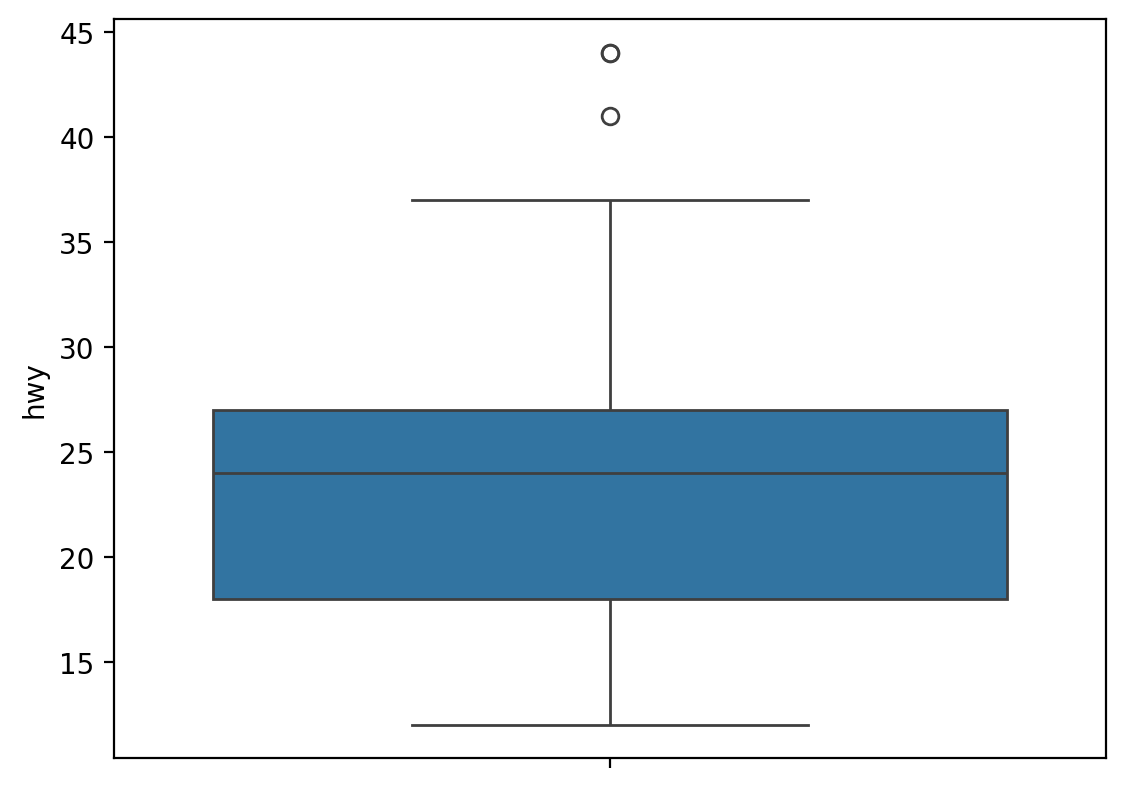

In [63]:
sns.boxplot(data = mpg, y = 'hwy');

### 박스상자의 구성요소

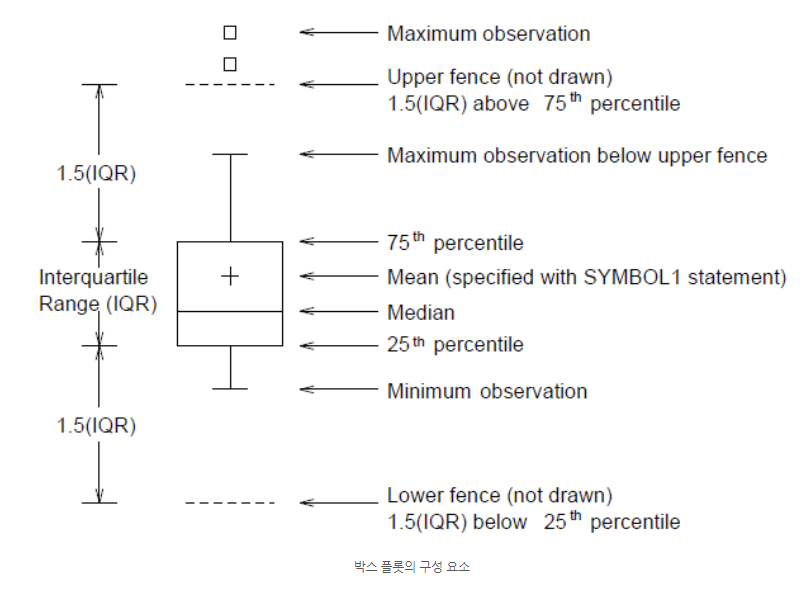

In [64]:
s = pd.Series([1,2,3,4,5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [65]:
s.quantile() # : 시리즈나 데이터프레임의 분위수를 계산하는 함수 (기본값 : q=0.5(중앙값))

np.float64(3.0)

In [66]:
s.quantile([0, .5, 1])

,0
0.0,1.0
0.5,3.0
1.0,5.0


In [67]:
s.quantile([.1, .2, .5, .75, 1])

,0
0.10,1.4
0.20,1.8
0.50,3.0
0.75,4.0
1.00,5.0


In [68]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [70]:
mpg.hwy.quantile([0, .25, .5, .75, 1])

,hwy
0.00,12.0
0.25,18.0
0.50,24.0
0.75,27.0
1.00,44.0


In [71]:
a, b = 10, 20
a

10

In [74]:
p25, p50, p75 = mpg.hwy.quantile([.25, .5, .75])
p25, p50, p75

(18.0, 24.0, 27.0)

In [76]:
iqr = p75 - p25
iqr

9.0

In [77]:
# upper fence
UF = p75 +1.5 * iqr
UF

40.5

In [78]:
# lower face
LF = p25 - 1.5 * iqr
LF

4.5

In [79]:
mpg.hwy.describe()['75%']

np.float64(27.0)

In [80]:
mpg[ mpg.hwy > UF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


<Axes: ylabel='hwy'>

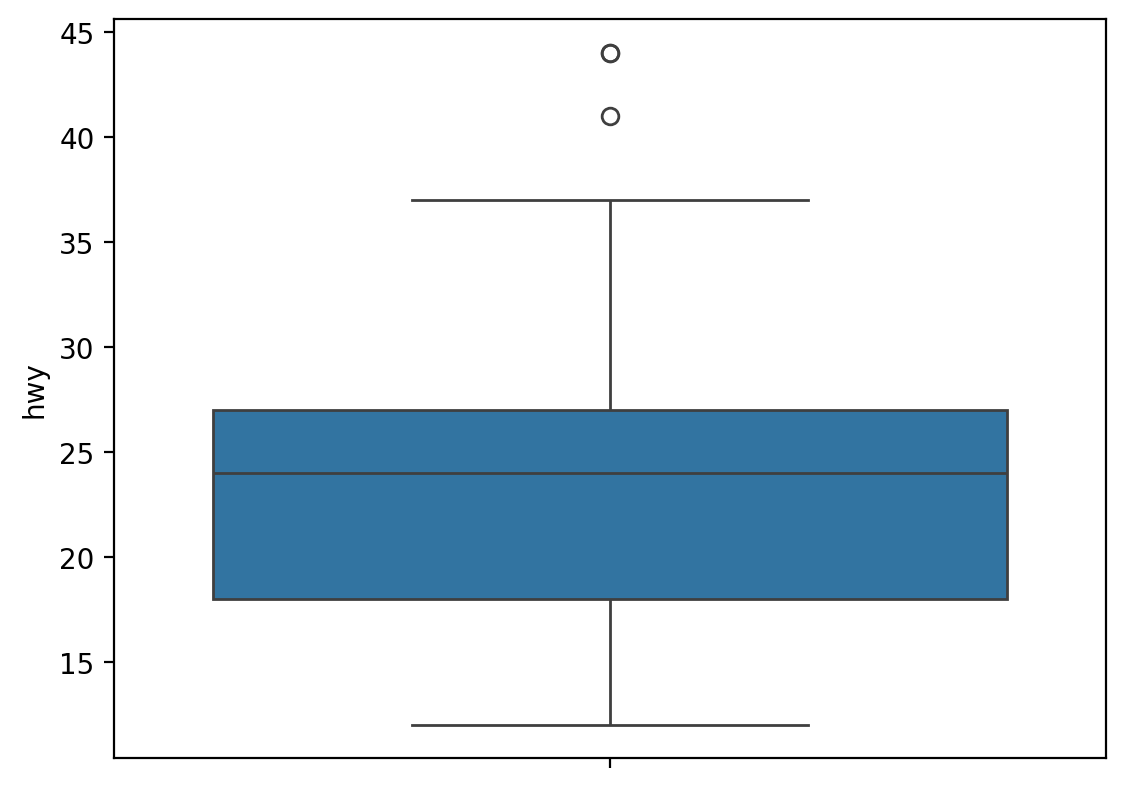

In [81]:
sns.boxplot(data=mpg, y='hwy')

In [82]:
mpg[ mpg.hwy > UF ]['hwy']

,hwy
212,44
221,44
222,41


In [83]:
mpg[ mpg.hwy < LF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [84]:
mpg.isna().sum().sum()

np.int64(0)

In [85]:
mpg[ (mpg.hwy > UF) | (mpg.hwy < LF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [86]:
mpg['hwy'] = np.where((mpg.hwy > UF) | (mpg.hwy < LF), np.nan, mpg.hwy)
mpg[ mpg.hwy.isna() ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [87]:
mpg.shape

(234, 11)

In [88]:
len(mpg)

234

In [89]:
dmpg = mpg.dropna(subset=['hwy'])
len(dmpg)

231

In [90]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [91]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [92]:
mpg.isna().sum().sum()

np.int64(3)

In [93]:
mpg = pd.read_csv('data/mpg.csv')
mpg.isna().sum().sum()

np.int64(0)

In [94]:
mpg[ (mpg.hwy > UF) | (mpg.hwy < LF)]['hwy']

,hwy
212,44
221,44
222,41


In [95]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


## 8장 그래프

In [96]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.7 MB/s eta 0:00:00


In [100]:
%config InlineBackend.figure_format = 'retina'

In [101]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [106]:
plt.rcParams.update({'figure.dpi' : '100'})
plt.rcParams.update({'figure.figsize' : [4, 2.5]})

In [107]:
mpg = pd.read_csv('data/mpg.csv')

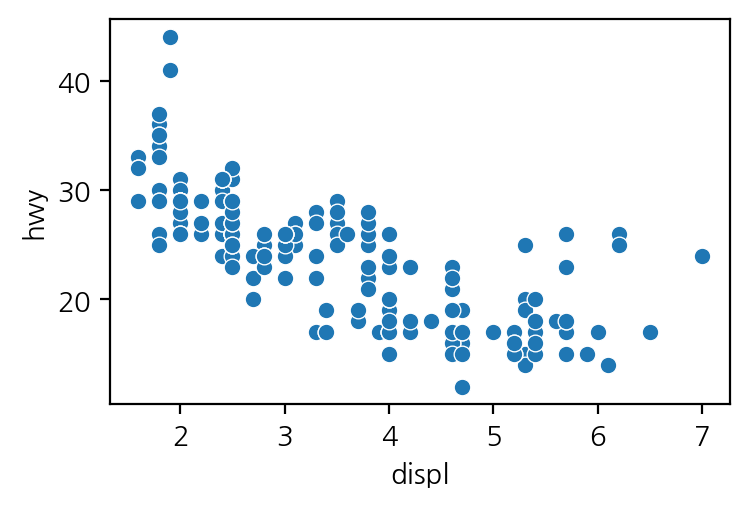

In [109]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

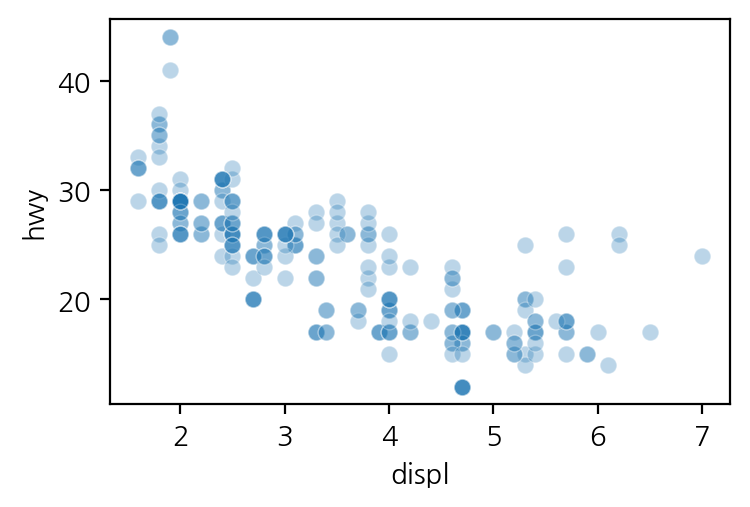

In [110]:
sns.scatterplot(mpg, x='displ', y='hwy', alpha=.3);

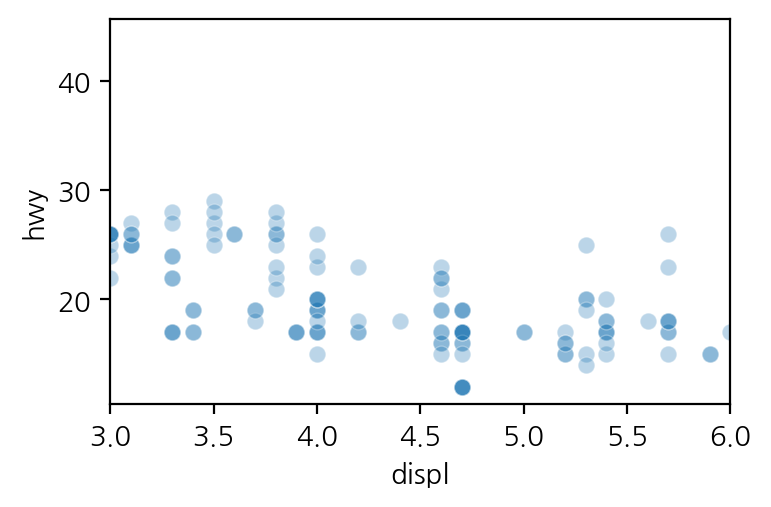

In [111]:
sns.scatterplot(mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3,6]); # xlim()

[(3.0, 6.0), (10.0, 30.0)]

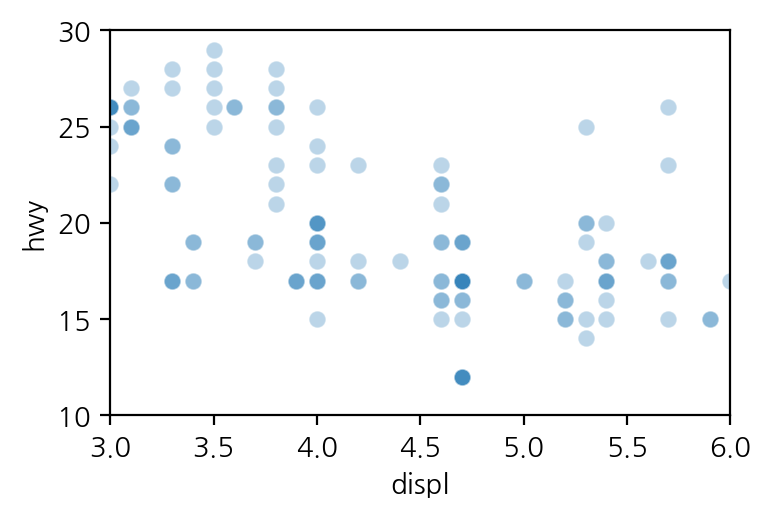

In [112]:
sns.scatterplot(mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3,6], ylim=[10,30])

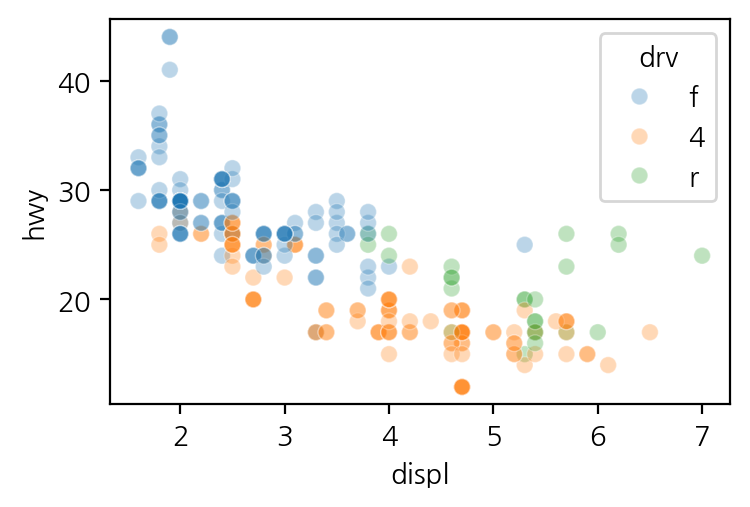

In [113]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='drv', alpha=.3);

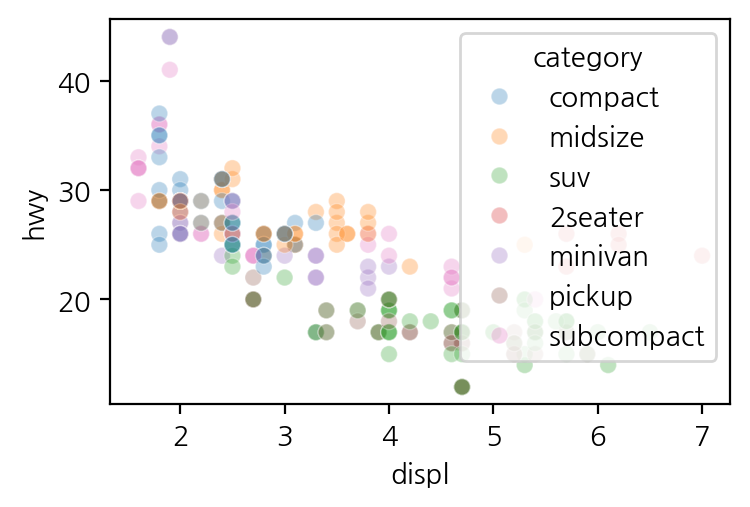

In [114]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category', alpha=.3);

| 문자열              | 숫자 | 설명                |
| ---------------- | -- | ----------------- |
| `"best"`         | 0  | 플롯 내부에서 가장 적절한 위치 |
| `"upper right"`  | 1  | 오른쪽 위             |
| `"upper left"`   | 2  | 왼쪽 위              |
| `"lower left"`   | 3  | 왼쪽 아래             |
| `"lower right"`  | 4  | 오른쪽 아래            |
| `"right"`        | 5  | 오른쪽 중앙            |
| `"center left"`  | 6  | 왼쪽 중앙             |
| `"center right"` | 7  | 오른쪽 중앙            |
| `"lower center"` | 8  | 아래 중앙             |
| `"upper center"` | 9  | 위 중앙              |
| `"center"`       | 10 | 중앙                |

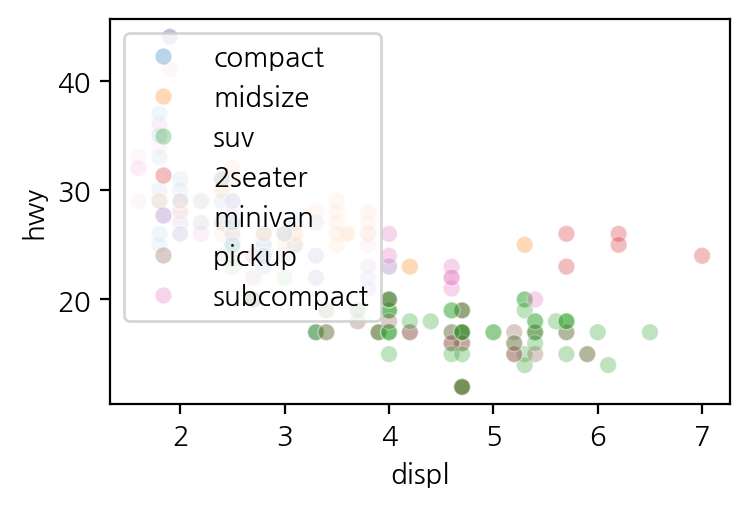

In [117]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category', alpha=.3);
plt.legend(loc=2);

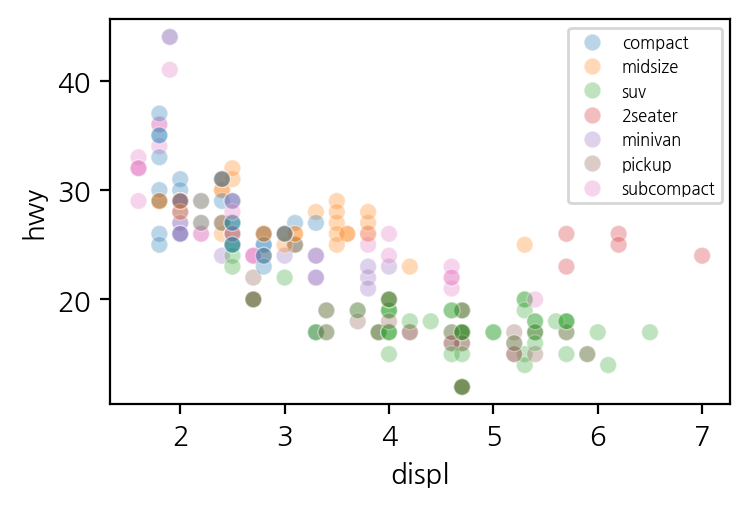

In [118]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category', alpha=.3);
plt.legend(loc=1, fontsize=6);

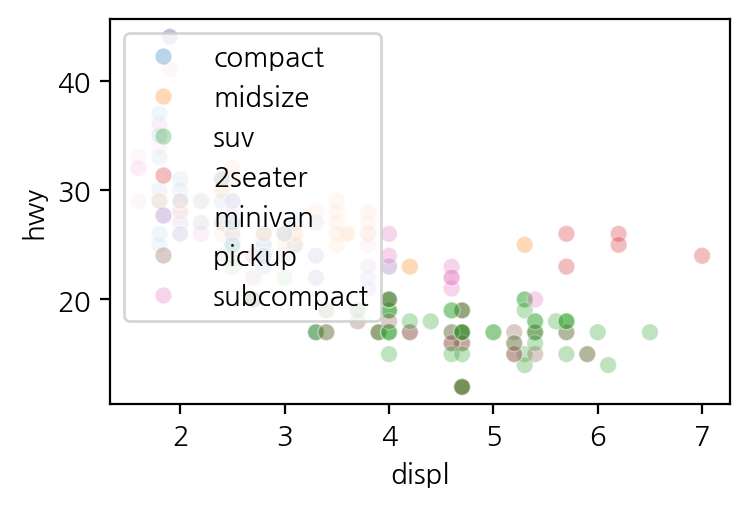

In [119]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category', alpha=.3);
plt.legend(loc='upper left');

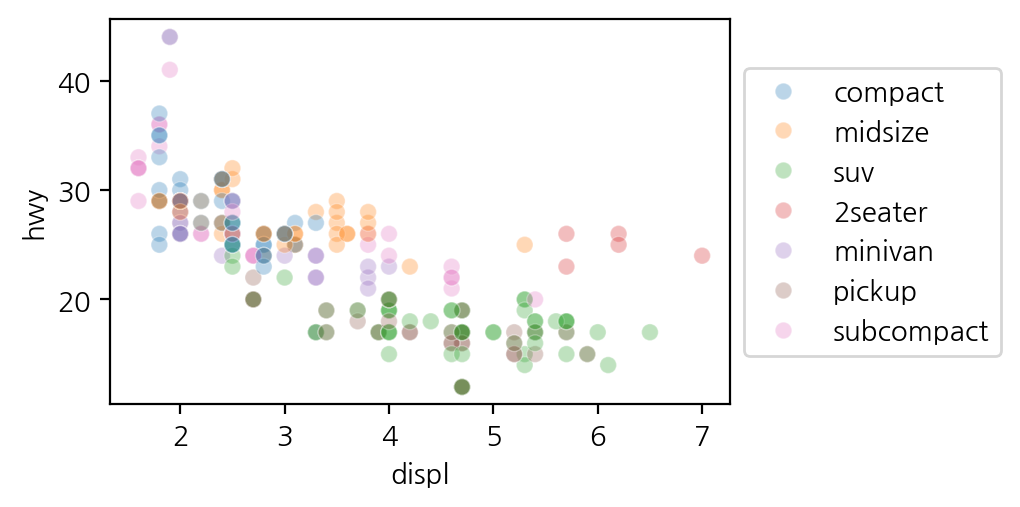

In [120]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category', alpha=.3);
plt.legend(loc=6, bbox_to_anchor=(1, .5)); # bbox_to_anchor : 기준 상자

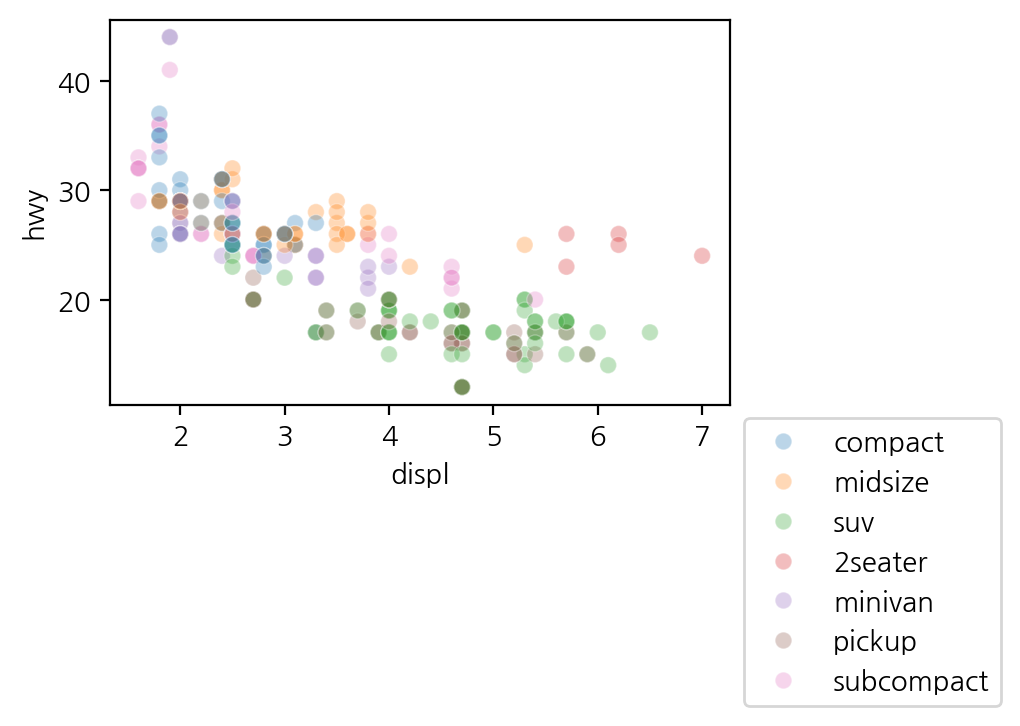

In [121]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category', alpha=.3);
plt.legend(loc=2, bbox_to_anchor=(1, 0));

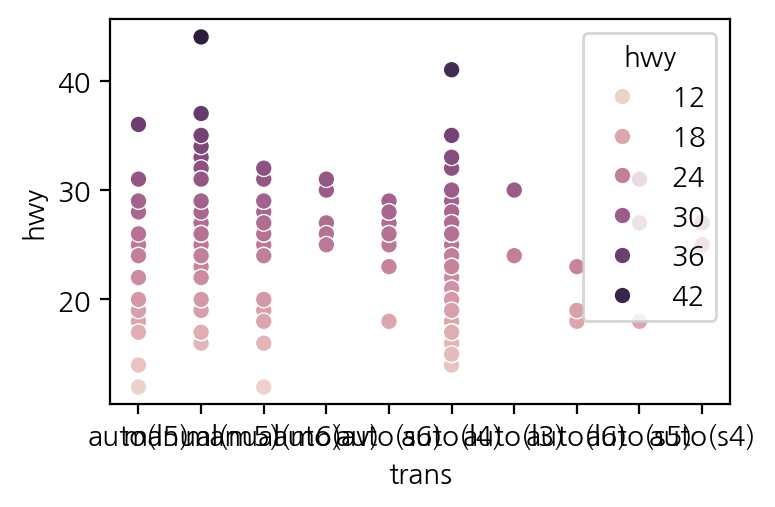

In [122]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

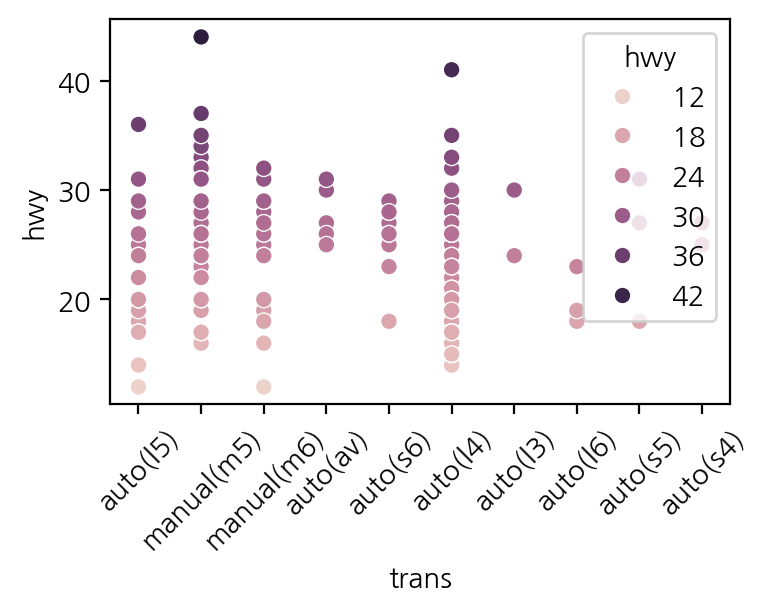

In [124]:
my = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my.tick_params(axis='x', labelrotation=45);  # tick_paramsm : 스타일 설정

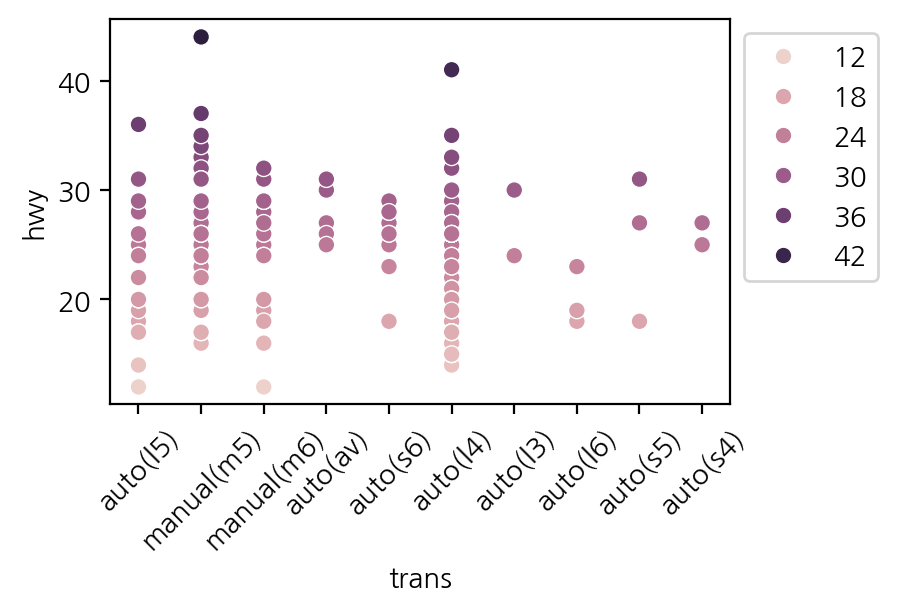

In [125]:
my = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my.tick_params(axis='x', labelrotation=45);
my.legend(loc=2, bbox_to_anchor=(1, 1));

## 종료